In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# Building the network

In [6]:
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_nodes,
                    kernel_initializer=keras.initializers.RandomUniform(-10, 10),
                    activation='sigmoid',
                    input_dim=input_nodes))
    model.add(Dense(units=output_nodes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate, momentum=0.9, nesterov=True),
                  metrics=['accuracy']                  
                 )
    
    return model

Using TensorFlow backend.


In [7]:
import os
import shutil

dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

epochs = 1000
learning_rate = 0.0001
hidden_nodes = 2000
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

model = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)

save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                            verbose=0, 
                                            save_best_only=False,                                           
                                            save_weights_only=False,
                                            mode='auto',                                           
                                            period=1)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[save_model_checkpoint]
                   )

Train on 455 samples, validate on 114 samples
Epoch 1/1000
455/455 [==============================] - 0s 599us/step - loss: 0.7673 - acc: 0.4659 - val_loss: 0.6963 - val_acc: 0.6316
Epoch 2/1000
455/455 [==============================] - 0s 121us/step - loss: 0.6727 - acc: 0.6374 - val_loss: 0.6268 - val_acc: 0.6491
Epoch 3/1000
455/455 [==============================] - 0s 122us/step - loss: 0.6125 - acc: 0.6418 - val_loss: 0.5738 - val_acc: 0.7368
Epoch 4/1000
455/455 [==============================] - 0s 127us/step - loss: 0.5691 - acc: 0.7934 - val_loss: 0.5253 - val_acc: 0.7193
Epoch 5/1000
455/455 [==============================] - 0s 116us/step - loss: 0.5244 - acc: 0.7341 - val_loss: 0.4863 - val_acc: 0.8947
Epoch 6/1000
455/455 [==============================] - 0s 127us/step - loss: 0.4877 - acc: 0.8220 - val_loss: 0.4568 - val_acc: 0.8772
Epoch 7/1000
455/455 [==============================] - 0s 118us/step - loss: 0.4627 - acc: 0.8857 - val_loss: 0.4300 - val_acc: 0.8772
Ep

Epoch 61/1000
455/455 [==============================] - 0s 77us/step - loss: 0.2433 - acc: 0.9055 - val_loss: 0.2342 - val_acc: 0.9035
Epoch 62/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2424 - acc: 0.9077 - val_loss: 0.2348 - val_acc: 0.9123
Epoch 63/1000
455/455 [==============================] - 0s 68us/step - loss: 0.2415 - acc: 0.9055 - val_loss: 0.2338 - val_acc: 0.9123
Epoch 64/1000
455/455 [==============================] - 0s 59us/step - loss: 0.2407 - acc: 0.9077 - val_loss: 0.2338 - val_acc: 0.9123
Epoch 65/1000
455/455 [==============================] - 0s 83us/step - loss: 0.2398 - acc: 0.9055 - val_loss: 0.2321 - val_acc: 0.9123
Epoch 66/1000
455/455 [==============================] - 0s 67us/step - loss: 0.2396 - acc: 0.9055 - val_loss: 0.2319 - val_acc: 0.9123
Epoch 67/1000
455/455 [==============================] - 0s 69us/step - loss: 0.2384 - acc: 0.9077 - val_loss: 0.2331 - val_acc: 0.9123
Epoch 68/1000
455/455 [=========================

455/455 [==============================] - 0s 82us/step - loss: 0.2123 - acc: 0.9077 - val_loss: 0.2143 - val_acc: 0.9211
Epoch 122/1000
455/455 [==============================] - 0s 75us/step - loss: 0.2110 - acc: 0.9099 - val_loss: 0.2169 - val_acc: 0.9211
Epoch 123/1000
455/455 [==============================] - 0s 76us/step - loss: 0.2107 - acc: 0.9143 - val_loss: 0.2148 - val_acc: 0.9211
Epoch 124/1000
455/455 [==============================] - 0s 66us/step - loss: 0.2108 - acc: 0.9099 - val_loss: 0.2138 - val_acc: 0.9211
Epoch 125/1000
455/455 [==============================] - 0s 101us/step - loss: 0.2110 - acc: 0.9099 - val_loss: 0.2140 - val_acc: 0.9211
Epoch 126/1000
455/455 [==============================] - 0s 99us/step - loss: 0.2103 - acc: 0.9077 - val_loss: 0.2136 - val_acc: 0.9211
Epoch 127/1000
455/455 [==============================] - 0s 114us/step - loss: 0.2099 - acc: 0.9077 - val_loss: 0.2143 - val_acc: 0.9211
Epoch 128/1000
455/455 [==============================

Epoch 181/1000
455/455 [==============================] - 0s 71us/step - loss: 0.1994 - acc: 0.9253 - val_loss: 0.2131 - val_acc: 0.9123
Epoch 182/1000
455/455 [==============================] - 0s 76us/step - loss: 0.1939 - acc: 0.9209 - val_loss: 0.2049 - val_acc: 0.9211
Epoch 183/1000
455/455 [==============================] - 0s 65us/step - loss: 0.1965 - acc: 0.9187 - val_loss: 0.2053 - val_acc: 0.9211
Epoch 184/1000
455/455 [==============================] - 0s 67us/step - loss: 0.1958 - acc: 0.9187 - val_loss: 0.2069 - val_acc: 0.9211
Epoch 185/1000
455/455 [==============================] - 0s 69us/step - loss: 0.1952 - acc: 0.9209 - val_loss: 0.2074 - val_acc: 0.9211
Epoch 186/1000
455/455 [==============================] - 0s 67us/step - loss: 0.1950 - acc: 0.9209 - val_loss: 0.2068 - val_acc: 0.9211
Epoch 187/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1950 - acc: 0.9209 - val_loss: 0.2072 - val_acc: 0.9211
Epoch 188/1000
455/455 [=================

Epoch 241/1000
455/455 [==============================] - 0s 76us/step - loss: 0.1878 - acc: 0.9253 - val_loss: 0.2059 - val_acc: 0.9211
Epoch 242/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1874 - acc: 0.9253 - val_loss: 0.2027 - val_acc: 0.9211
Epoch 243/1000
455/455 [==============================] - 0s 70us/step - loss: 0.1872 - acc: 0.9231 - val_loss: 0.2016 - val_acc: 0.9211
Epoch 244/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1877 - acc: 0.9231 - val_loss: 0.2026 - val_acc: 0.9211
Epoch 245/1000
455/455 [==============================] - 0s 71us/step - loss: 0.1877 - acc: 0.9231 - val_loss: 0.2053 - val_acc: 0.9211
Epoch 246/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1872 - acc: 0.9253 - val_loss: 0.2041 - val_acc: 0.9211
Epoch 247/1000
455/455 [==============================] - 0s 76us/step - loss: 0.1870 - acc: 0.9253 - val_loss: 0.2018 - val_acc: 0.9211
Epoch 248/1000
455/455 [=================

Epoch 301/1000
455/455 [==============================] - 0s 62us/step - loss: 0.1814 - acc: 0.9275 - val_loss: 0.2002 - val_acc: 0.9211
Epoch 302/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1798 - acc: 0.9275 - val_loss: 0.1994 - val_acc: 0.9211
Epoch 303/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1798 - acc: 0.9253 - val_loss: 0.1998 - val_acc: 0.9211
Epoch 304/1000
455/455 [==============================] - 0s 76us/step - loss: 0.1814 - acc: 0.9297 - val_loss: 0.2004 - val_acc: 0.9211
Epoch 305/1000
455/455 [==============================] - 0s 69us/step - loss: 0.1813 - acc: 0.9231 - val_loss: 0.1983 - val_acc: 0.9211
Epoch 306/1000
455/455 [==============================] - 0s 61us/step - loss: 0.1794 - acc: 0.9231 - val_loss: 0.2007 - val_acc: 0.9211
Epoch 307/1000
455/455 [==============================] - 0s 68us/step - loss: 0.1802 - acc: 0.9297 - val_loss: 0.2039 - val_acc: 0.9211
Epoch 308/1000
455/455 [=================

Epoch 361/1000
455/455 [==============================] - 0s 64us/step - loss: 0.1753 - acc: 0.9275 - val_loss: 0.1962 - val_acc: 0.9211
Epoch 362/1000
455/455 [==============================] - 0s 65us/step - loss: 0.1757 - acc: 0.9253 - val_loss: 0.1972 - val_acc: 0.9211
Epoch 363/1000
455/455 [==============================] - 0s 60us/step - loss: 0.1765 - acc: 0.9297 - val_loss: 0.2028 - val_acc: 0.9211
Epoch 364/1000
455/455 [==============================] - 0s 77us/step - loss: 0.1757 - acc: 0.9275 - val_loss: 0.1985 - val_acc: 0.9211
Epoch 365/1000
455/455 [==============================] - 0s 136us/step - loss: 0.1754 - acc: 0.9275 - val_loss: 0.1958 - val_acc: 0.9298
Epoch 366/1000
455/455 [==============================] - 0s 154us/step - loss: 0.1759 - acc: 0.9275 - val_loss: 0.1979 - val_acc: 0.9211
Epoch 367/1000
455/455 [==============================] - 0s 131us/step - loss: 0.1754 - acc: 0.9275 - val_loss: 0.1975 - val_acc: 0.9211
Epoch 368/1000
455/455 [==============

455/455 [==============================] - 0s 92us/step - loss: 0.1713 - acc: 0.9275 - val_loss: 0.1949 - val_acc: 0.9298
Epoch 421/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1716 - acc: 0.9275 - val_loss: 0.1948 - val_acc: 0.9298
Epoch 422/1000
455/455 [==============================] - 0s 60us/step - loss: 0.1715 - acc: 0.9275 - val_loss: 0.1935 - val_acc: 0.9298
Epoch 423/1000
455/455 [==============================] - 0s 60us/step - loss: 0.1716 - acc: 0.9275 - val_loss: 0.1941 - val_acc: 0.9298
Epoch 424/1000
455/455 [==============================] - 0s 70us/step - loss: 0.1712 - acc: 0.9275 - val_loss: 0.1944 - val_acc: 0.9298
Epoch 425/1000
455/455 [==============================] - 0s 68us/step - loss: 0.1712 - acc: 0.9275 - val_loss: 0.1940 - val_acc: 0.9298
Epoch 426/1000
455/455 [==============================] - 0s 76us/step - loss: 0.1711 - acc: 0.9275 - val_loss: 0.1956 - val_acc: 0.9298
Epoch 427/1000
455/455 [==============================] 

Epoch 480/1000
455/455 [==============================] - 0s 80us/step - loss: 0.1684 - acc: 0.9275 - val_loss: 0.1934 - val_acc: 0.9298
Epoch 481/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1685 - acc: 0.9275 - val_loss: 0.1925 - val_acc: 0.9298
Epoch 482/1000
455/455 [==============================] - 0s 103us/step - loss: 0.1682 - acc: 0.9275 - val_loss: 0.1930 - val_acc: 0.9298
Epoch 483/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1693 - acc: 0.9275 - val_loss: 0.1933 - val_acc: 0.9298
Epoch 484/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1684 - acc: 0.9275 - val_loss: 0.1920 - val_acc: 0.9298
Epoch 485/1000
455/455 [==============================] - 0s 162us/step - loss: 0.1681 - acc: 0.9275 - val_loss: 0.1924 - val_acc: 0.9298
Epoch 486/1000
455/455 [==============================] - 0s 150us/step - loss: 0.1681 - acc: 0.9275 - val_loss: 0.1940 - val_acc: 0.9298
Epoch 487/1000
455/455 [=============

455/455 [==============================] - 0s 73us/step - loss: 0.1660 - acc: 0.9319 - val_loss: 0.1934 - val_acc: 0.9298
Epoch 540/1000
455/455 [==============================] - 0s 71us/step - loss: 0.1666 - acc: 0.9275 - val_loss: 0.1900 - val_acc: 0.9298
Epoch 541/1000
455/455 [==============================] - 0s 77us/step - loss: 0.1656 - acc: 0.9275 - val_loss: 0.1907 - val_acc: 0.9298
Epoch 542/1000
455/455 [==============================] - ETA: 0s - loss: 0.0735 - acc: 1.000 - 0s 72us/step - loss: 0.1659 - acc: 0.9275 - val_loss: 0.1898 - val_acc: 0.9298
Epoch 543/1000
455/455 [==============================] - 0s 82us/step - loss: 0.1654 - acc: 0.9275 - val_loss: 0.1911 - val_acc: 0.9298
Epoch 544/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1660 - acc: 0.9275 - val_loss: 0.1925 - val_acc: 0.9298
Epoch 545/1000
455/455 [==============================] - 0s 71us/step - loss: 0.1655 - acc: 0.9297 - val_loss: 0.1904 - val_acc: 0.9298
Epoch 546/1000
455

455/455 [==============================] - 0s 69us/step - loss: 0.1636 - acc: 0.9275 - val_loss: 0.1903 - val_acc: 0.9298
Epoch 599/1000
455/455 [==============================] - 0s 69us/step - loss: 0.1633 - acc: 0.9275 - val_loss: 0.1889 - val_acc: 0.9298
Epoch 600/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1632 - acc: 0.9275 - val_loss: 0.1907 - val_acc: 0.9298
Epoch 601/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1630 - acc: 0.9275 - val_loss: 0.1900 - val_acc: 0.9298
Epoch 602/1000
455/455 [==============================] - 0s 64us/step - loss: 0.1630 - acc: 0.9275 - val_loss: 0.1904 - val_acc: 0.9298
Epoch 603/1000
455/455 [==============================] - 0s 69us/step - loss: 0.1627 - acc: 0.9275 - val_loss: 0.1893 - val_acc: 0.9298
Epoch 604/1000
455/455 [==============================] - 0s 73us/step - loss: 0.1629 - acc: 0.9275 - val_loss: 0.1890 - val_acc: 0.9298
Epoch 605/1000
455/455 [==============================] 

Epoch 658/1000
455/455 [==============================] - 0s 113us/step - loss: 0.1626 - acc: 0.9319 - val_loss: 0.1915 - val_acc: 0.9298
Epoch 659/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1605 - acc: 0.9297 - val_loss: 0.1872 - val_acc: 0.9298
Epoch 660/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1611 - acc: 0.9297 - val_loss: 0.1871 - val_acc: 0.9298
Epoch 661/1000
455/455 [==============================] - 0s 63us/step - loss: 0.1605 - acc: 0.9297 - val_loss: 0.1886 - val_acc: 0.9298
Epoch 662/1000
455/455 [==============================] - 0s 71us/step - loss: 0.1604 - acc: 0.9297 - val_loss: 0.1903 - val_acc: 0.9298
Epoch 663/1000
455/455 [==============================] - 0s 65us/step - loss: 0.1612 - acc: 0.9275 - val_loss: 0.1891 - val_acc: 0.9298
Epoch 664/1000
455/455 [==============================] - 0s 62us/step - loss: 0.1605 - acc: 0.9275 - val_loss: 0.1885 - val_acc: 0.9298
Epoch 665/1000
455/455 [===============

Epoch 718/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1584 - acc: 0.9297 - val_loss: 0.1862 - val_acc: 0.9298
Epoch 719/1000
455/455 [==============================] - 0s 69us/step - loss: 0.1590 - acc: 0.9297 - val_loss: 0.1862 - val_acc: 0.9298
Epoch 720/1000
455/455 [==============================] - 0s 71us/step - loss: 0.1583 - acc: 0.9297 - val_loss: 0.1875 - val_acc: 0.9298
Epoch 721/1000
455/455 [==============================] - 0s 77us/step - loss: 0.1584 - acc: 0.9319 - val_loss: 0.1881 - val_acc: 0.9298
Epoch 722/1000
455/455 [==============================] - 0s 60us/step - loss: 0.1582 - acc: 0.9319 - val_loss: 0.1872 - val_acc: 0.9298
Epoch 723/1000
455/455 [==============================] - 0s 63us/step - loss: 0.1584 - acc: 0.9319 - val_loss: 0.1870 - val_acc: 0.9298
Epoch 724/1000
455/455 [==============================] - 0s 62us/step - loss: 0.1583 - acc: 0.9297 - val_loss: 0.1859 - val_acc: 0.9298
Epoch 725/1000
455/455 [=================

Epoch 778/1000
455/455 [==============================] - 0s 70us/step - loss: 0.1570 - acc: 0.9319 - val_loss: 0.1862 - val_acc: 0.9298
Epoch 779/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1564 - acc: 0.9319 - val_loss: 0.1881 - val_acc: 0.9298
Epoch 780/1000
455/455 [==============================] - 0s 75us/step - loss: 0.1571 - acc: 0.9297 - val_loss: 0.1866 - val_acc: 0.9298
Epoch 781/1000
455/455 [==============================] - 0s 74us/step - loss: 0.1565 - acc: 0.9297 - val_loss: 0.1867 - val_acc: 0.9298
Epoch 782/1000
455/455 [==============================] - 0s 58us/step - loss: 0.1559 - acc: 0.9319 - val_loss: 0.1842 - val_acc: 0.9298
Epoch 783/1000
455/455 [==============================] - 0s 69us/step - loss: 0.1562 - acc: 0.9319 - val_loss: 0.1855 - val_acc: 0.9298
Epoch 784/1000
455/455 [==============================] - 0s 64us/step - loss: 0.1561 - acc: 0.9319 - val_loss: 0.1859 - val_acc: 0.9298
Epoch 785/1000
455/455 [=================

Epoch 838/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1545 - acc: 0.9341 - val_loss: 0.1855 - val_acc: 0.9298
Epoch 839/1000
455/455 [==============================] - 0s 70us/step - loss: 0.1541 - acc: 0.9319 - val_loss: 0.1843 - val_acc: 0.9298
Epoch 840/1000
455/455 [==============================] - 0s 70us/step - loss: 0.1542 - acc: 0.9341 - val_loss: 0.1837 - val_acc: 0.9298
Epoch 841/1000
455/455 [==============================] - 0s 74us/step - loss: 0.1541 - acc: 0.9319 - val_loss: 0.1834 - val_acc: 0.9298
Epoch 842/1000
455/455 [==============================] - 0s 77us/step - loss: 0.1547 - acc: 0.9319 - val_loss: 0.1833 - val_acc: 0.9298
Epoch 843/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1534 - acc: 0.9341 - val_loss: 0.1856 - val_acc: 0.9298
Epoch 844/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1557 - acc: 0.9341 - val_loss: 0.1853 - val_acc: 0.9298
Epoch 845/1000
455/455 [=================

Epoch 898/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1525 - acc: 0.9341 - val_loss: 0.1849 - val_acc: 0.9298
Epoch 899/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1522 - acc: 0.9341 - val_loss: 0.1827 - val_acc: 0.9298
Epoch 900/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1523 - acc: 0.9319 - val_loss: 0.1819 - val_acc: 0.9298
Epoch 901/1000
455/455 [==============================] - 0s 118us/step - loss: 0.1523 - acc: 0.9319 - val_loss: 0.1832 - val_acc: 0.9298
Epoch 902/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1529 - acc: 0.9297 - val_loss: 0.1833 - val_acc: 0.9298
Epoch 903/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1518 - acc: 0.9319 - val_loss: 0.1814 - val_acc: 0.9298
Epoch 904/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1523 - acc: 0.9319 - val_loss: 0.1820 - val_acc: 0.9298
Epoch 905/1000
455/455 [==============

455/455 [==============================] - 0s 101us/step - loss: 0.1505 - acc: 0.9341 - val_loss: 0.1813 - val_acc: 0.9298
Epoch 958/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1504 - acc: 0.9341 - val_loss: 0.1817 - val_acc: 0.9298
Epoch 959/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1502 - acc: 0.9341 - val_loss: 0.1812 - val_acc: 0.9298
Epoch 960/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1504 - acc: 0.9341 - val_loss: 0.1812 - val_acc: 0.9298
Epoch 961/1000
455/455 [==============================] - 0s 119us/step - loss: 0.1502 - acc: 0.9341 - val_loss: 0.1814 - val_acc: 0.9298
Epoch 962/1000
455/455 [==============================] - 0s 177us/step - loss: 0.1506 - acc: 0.9341 - val_loss: 0.1814 - val_acc: 0.9298
Epoch 963/1000
455/455 [==============================] - 0s 114us/step - loss: 0.1504 - acc: 0.9363 - val_loss: 0.1843 - val_acc: 0.9298
Epoch 964/1000
455/455 [============================

In [8]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [9]:
print('best accuracy: %.3f' % max(history.history['acc']))
print('best validation accuracy: %.3f' % max(history.history['val_acc']))

best accuracy: 0.938
best validation accuracy: 0.939


# Weight analysis

In [10]:
def output_data(layer):
    print('min :', np.min(layer))
    print('std-:', np.average(layer)-np.std(layer))
    print('avg :', np.average(layer))
    print('std+:', np.average(layer)+np.std(layer))
    print('max :', np.max(layer))
    print()
    
def bias_not_zeros(l):
    return np.sum(abs(l) >= 0) - np.sum(abs(l) < 1e-10)

def weight_input_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=1))

def weight_output_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=0))

m = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)
def process_epoch(n):
    files = sorted(os.listdir(dir))    
    filename = dir+files[n]
    m.load_weights(filename)

    first_layer_weights = m.layers[0].get_weights()[0]
    first_layer_biases = m.layers[0].get_weights()[1]
    second_layer_weights = m.layers[1].get_weights()[0]
    second_layer_biases = m.layers[1].get_weights()[1]
    
    return {
        'w1': first_layer_weights,
        'w1nzi': weight_input_not_zeros(first_layer_weights),
        'w1nzo': weight_output_not_zeros(first_layer_weights),
        'b1': first_layer_biases,
        'b1nz': bias_not_zeros(first_layer_biases),
        'w2': second_layer_weights,
        'w2nzi': weight_input_not_zeros(second_layer_weights),
        'w2nzo': weight_output_not_zeros(second_layer_weights),
        'b2': second_layer_biases,
        'b2nz': bias_not_zeros(second_layer_biases)
    }

a = process_epoch(200)

# Graphics

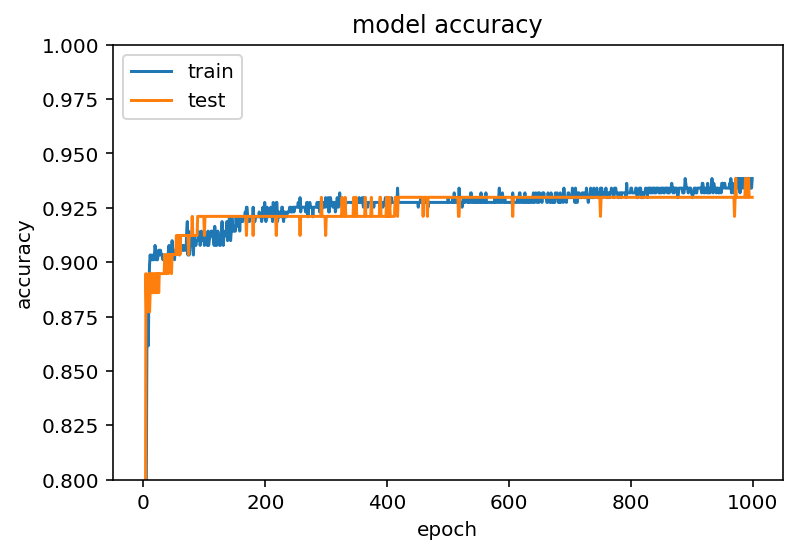

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.8, 1.0])
plt.show()

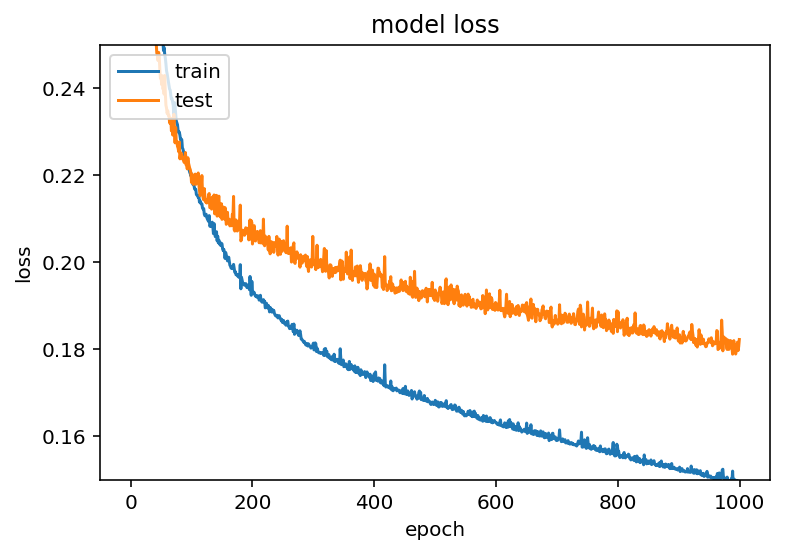

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.15, 0.25])
plt.show()

In [13]:
first_layer_weight_avg = []
first_layer_bias_avg = []
first_layer_bias_not_zero = []
w1nzi = []
w1nzo = []

second_layer_weight_avg = []
second_layer_bias_avg = []
second_layer_bias_not_zero = []
w2nzi = []
w2nzo = []

for i in range(epochs):
    r = process_epoch(i)
    first_layer_weight_avg.append(np.average(r['w1']))
    first_layer_bias_avg.append(np.average(r['b1']))
    first_layer_bias_not_zero.append(r['b1nz'])
    w1nzi.append(r['w1nzi'])
    w1nzo.append(r['w1nzo'])
    
    second_layer_weight_avg.append(np.average(r['w2']))
    second_layer_bias_avg.append(np.average(r['b2']))
    second_layer_bias_not_zero.append(r['b2nz'])
    w2nzi.append(r['w2nzi'])
    w2nzo.append(r['w2nzo'])

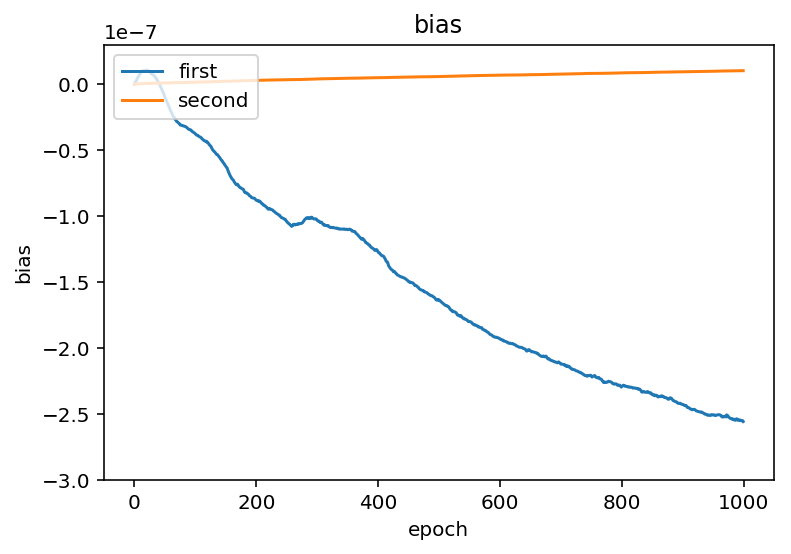

In [23]:
plt.plot(first_layer_bias_avg)
plt.plot(second_layer_bias_avg)
plt.title('bias')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['first', 'second'], loc='upper left')
plt.ylim([-3e-7, 3e-8])
plt.show()

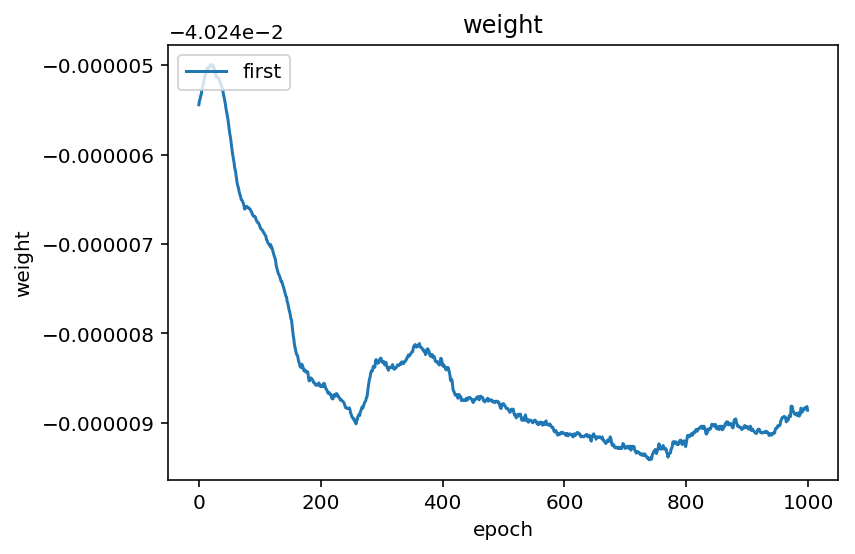

In [15]:
plt.plot(first_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['first'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

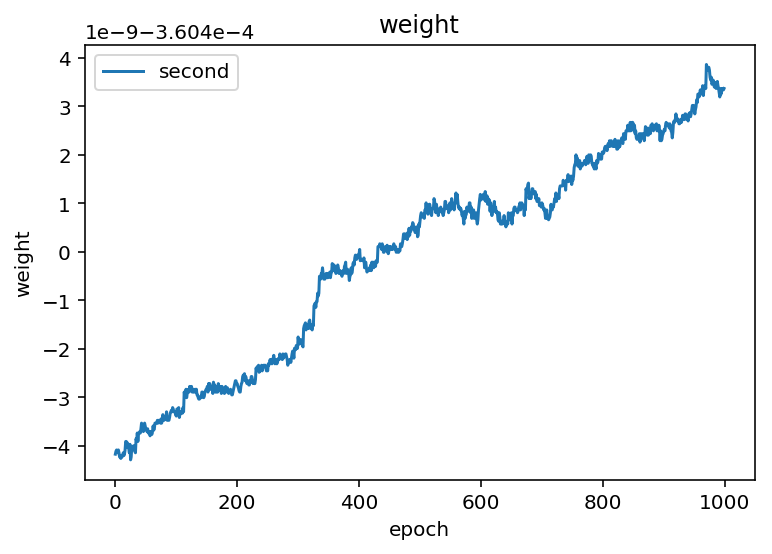

In [16]:
plt.plot(second_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

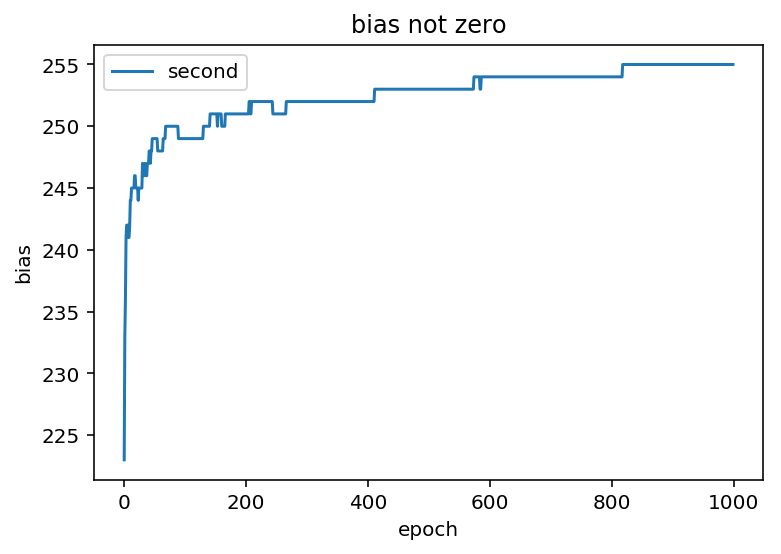

In [17]:
plt.plot(first_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

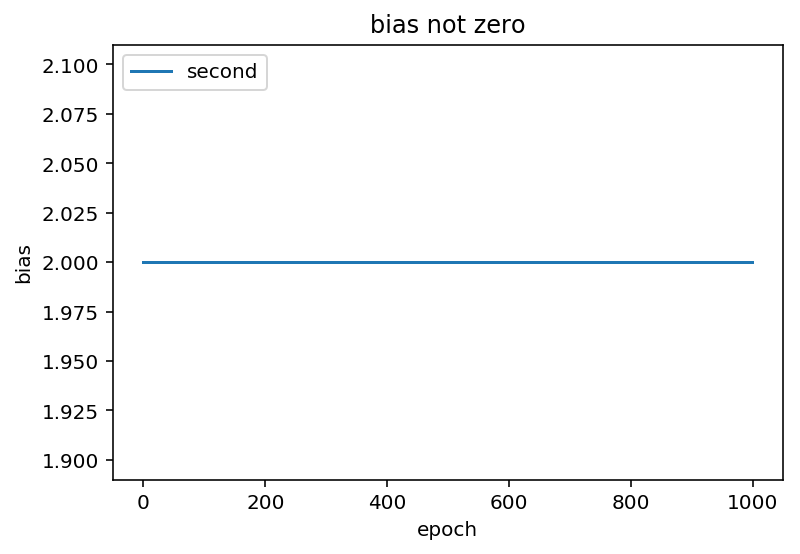

In [18]:
plt.plot(second_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

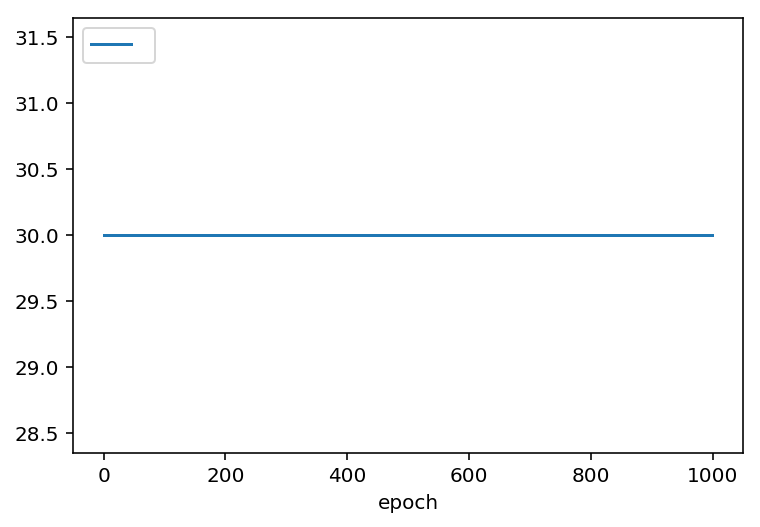

In [19]:
plt.plot(w1nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

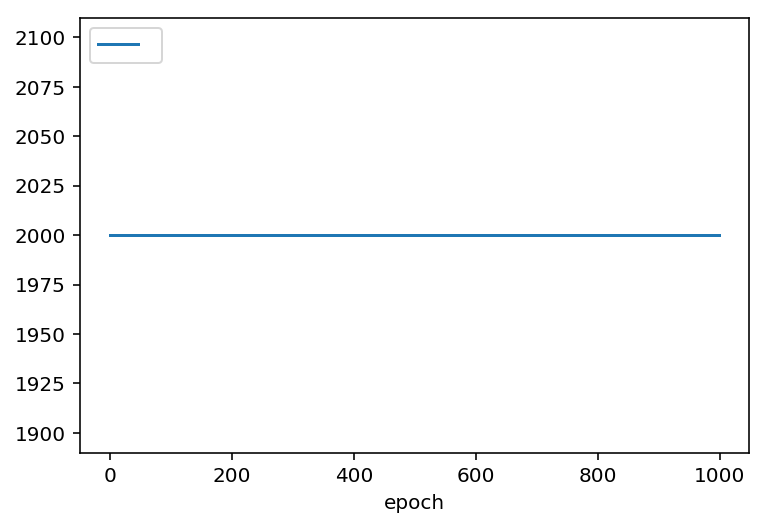

In [20]:
plt.plot(w1nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

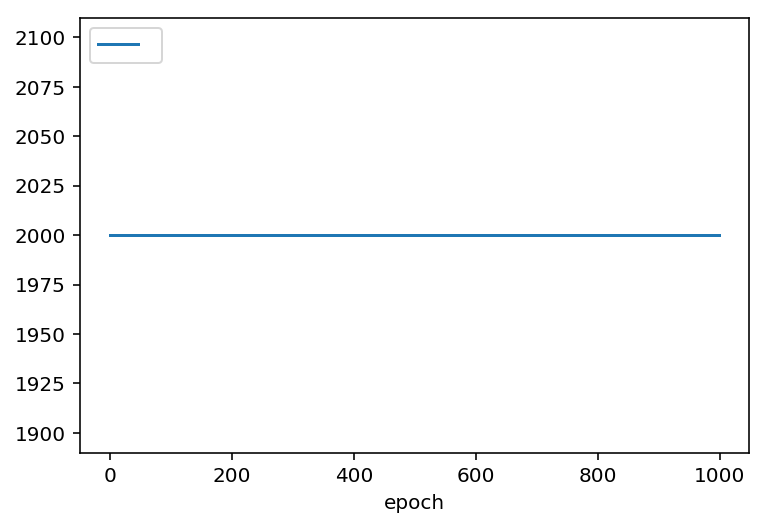

In [21]:
plt.plot(w2nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

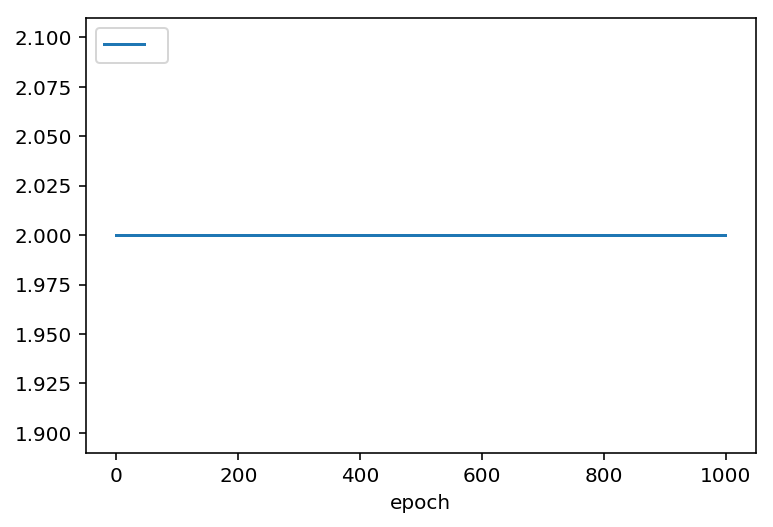

In [22]:
plt.plot(w2nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()